In [34]:
import pdfplumber
import re
import pandas as pd
import matplotlib.pyplot as plt
# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ""
    return text

In [25]:
pdf_path='data.pdf'
print(extract_text_from_pdf(pdf_path))

Account Number: 601101128178
Transaction date : From 06/10/2024 To 06/01/2025
Date Description Amount Type
05-01-2025 UPI/sethur409@okaxi/dad tooth DR
remov/INDIAN 850.00
OVERSEAS/500597141936/HDFcd
911215b85e4f02be904da04c997d2
d
05-01-2025 Personal Loan XX81362 EMI Vraj DR
19533.00
04-01-2025 UPI/sabari.1433@wah/na/AXIS DR
BANK/500484268483/ICIWC8C06 1500.00
E9D2E2CAAA8CC3F7B02FB2EFD
C/
04-01-2025 UPI/8668126460@ybl/Payment CR
from Ph/CITY UNION 5000.00
BANK/427954470426/YBL58328f6
57cca46f4aa6900f4a620633a
04-01-2025 UPI/8668126460@ybl/Next month DR
emi/CITY UNION 9000.00
BANK/631012461663/YBL760ed42
cec784ee6b2c477a09b9c0c68/
04-01-2025 UPI/vrajeshbabu82@y/Advance/Ko DR
tak Mahindra 8000.00
/942111303169/YBL5fd62caf73634
ea7ba154505082ddfb8/
03-01-2025 UPI/8754116988@okbi/Courier/AXI DR
S 80.00
BANK/500304675757/SMY250103
2000M89V45YWGLRDDN7LYI6TQ
O/
This is a system-generated statement. Hence, it does not require any signature. Page 1Account Number: 601101128178
Transaction date :

In [26]:
import pandas as pd

In [37]:
df=pd.read_csv('bankStatements.csv')

In [ ]:
df

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         26 non-null     object 
 1   Description  26 non-null     object 
 2   Amount       25 non-null     float64
 3   Type         25 non-null     object 
dtypes: float64(1), object(3)
memory usage: 960.0+ bytes


In [40]:
debit=df[df['Type']=='DR']
credit=df[df['Type']=='CR']

In [41]:
loan=df[df['Description'].str.contains('loan', case=False, na=False)]
loan

,Date,Description,Amount,Type
8,05-01-2025,Personal Loan XX81362 EMI Vraj,19533.0,DR


In [42]:
cred_usage=df[df['Description'].str.contains('cred', case=False, na=False)]
cred_usage

,Date,Description,Amount,Type
2,31-12-2024,UPI/cred.club@axisb/payment on CRED/AXIS BANK/...,6296.62,DR


In [43]:
income=df[df['Description'].str.contains('neft',case=False,na=False)]


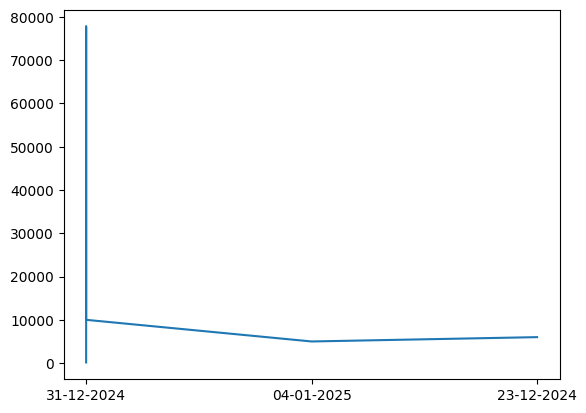

In [47]:
plt.plot(credit['Date'],credit['Amount'])

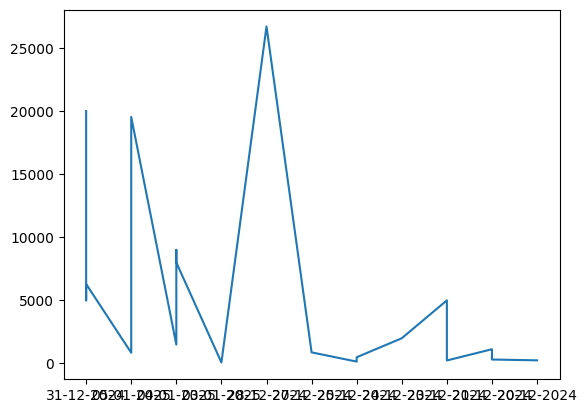

In [46]:
plt.plot(debit['Date'],debit['Amount'])

([<matplotlib.patches.Wedge at 0x1b00988c550>,
 [Text(-0.8018654676031947, 0.7530018405458981, ''),
  Text(0.8018654323526331, -0.7530018780839295, '')])

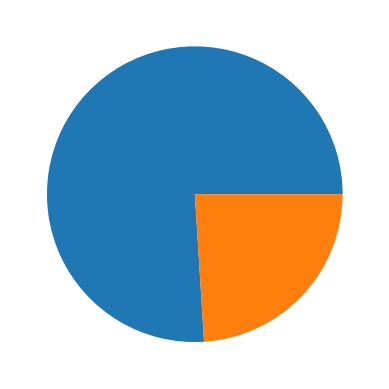

In [ ]:
plt.pie(df['Type'].value_counts())

In [ ]:
//payment trend
//

In [ ]:
[0.15,0.10,0.10,0.10,0.15,0.10,0.10,0.10,0.10]

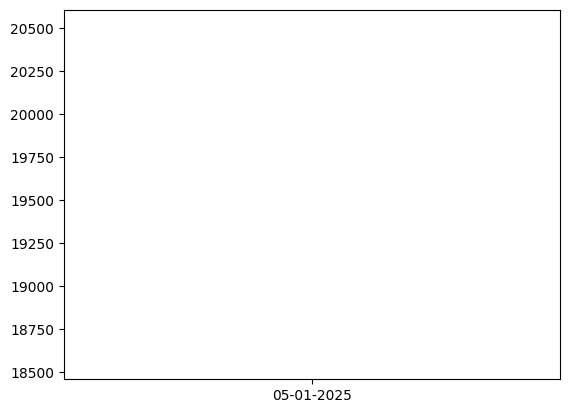

In [44]:
plt.plot(loan['Date'],loan['Amount'])


In [50]:
bank_loans = {
    "HDFC Bank": 
        {
            "Personal Loan": {
                "loan_amount": "₹50,000 to ₹40 lakhs",
                "tenure": "1 to 5 years",
                "interest_rate": "10.50% to 18% p.a.",
                "eligibility": "Salaried individuals with minimum income ₹25,000/month",
                "credit_score": "750+ preferred"}
          ,
            "Home Loan": {
                "loan_amount": "Up to 90% of property value",
                "tenure": "Up to 30 years",
                "interest_rate": "8.50% to 9.60% p.a.",
                "eligibility": "Salaried or self-employed with income of ₹25,000+/month",
                "credit_score": "700+"
            }
        }
    ,
    "State Bank of India (SBI)": 
        {
            "Personal Loan": {
                "loan_amount": "₹25,000 to ₹20 lakhs",
                "tenure": "Up to 6 years",
                "interest_rate": "10.90% to 12.90% p.a.",
                "eligibility": "Minimum monthly income ₹15,000 (salaried or pensioners)",
                "credit_score": "700+ preferred"
            }
           
        ,
        
            "Home Loan": {
                "loan_amount": "₹5 lakhs to ₹10 crores",
                "tenure": "Up to 30 years",
                "interest_rate": "9.15% to 9.75% p.a.",
                "eligibility": "Minimum monthly income ₹25,000",
                "credit_score": "700+"
            }
        }
    ,
    "ICICI Bank":{
        
            "Personal Loan": {
                "loan_amount": "₹50,000 to ₹50 lakhs",
                "tenure": "1 to 6 years",
                "interest_rate": "10.99% to 16.50% p.a.",
                "eligibility": "Salaried individuals earning ₹25,000+/month",
                "credit_score": "750+"
            },
        
        
            "Car Loan": {
                "loan_amount": "Up to 100% of on-road car price",
                "tenure": "1 to 7 years",
                "interest_rate": "8.50% to 12.75% p.a.",
                "eligibility": "Minimum annual income ₹2.5 lakhs",
                "credit_score": "720+ preferred"
            }}
        
    ,
    "Axis Bank": {
            "Business Loan": {
                "loan_amount": "₹50,000 to ₹5 crores",
                "tenure": "1 to 5 years",
                "interest_rate": "14% to 20% p.a.",
                "eligibility": "3+ years of business operation with turnover ₹50 lakhs+",
                "credit_score": "Good financial history required"
            },
        
            "Home Loan": {
                "loan_amount": "₹1 lakh to ₹5 crores",
                "tenure": "Up to 30 years",
                "interest_rate": "8.60% to 9.85% p.a.",
                "eligibility": "Salaried or self-employed with regular income",
                "credit_score": "700+"
            }
            }
        
    ,
    "Bajaj Finserv": {
        
            "Personal Loan": {
                "loan_amount": "₹50,000 to ₹25 lakhs",
                "tenure": "1 to 5 years",
                "interest_rate": "11% to 16% p.a.",
                "eligibility": "Salaried individuals with income of ₹20,000+/month",
                "credit_score": "750+ preferred"
            },
        
            "Loan Against Property": {
                "loan_amount": "₹10 lakhs to ₹5 crores",
                "tenure": "Up to 15 years",
                "interest_rate": "8.50% to 11% p.a.",
                "eligibility": "Salaried or self-employed with property ownership",
                "credit_score": "750+ preferred"
            }
        
    
}}}

In [51]:
bank_loans.keys()

dict_keys(['HDFC Bank'])